In [10]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family']=['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action='ignore')

回归方程：
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n $$
$$ \text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$
$$ 
\begin{document}

\[
\boldsymbol{\Rightarrow} \quad \hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
\]

\end{document} $$


In [11]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

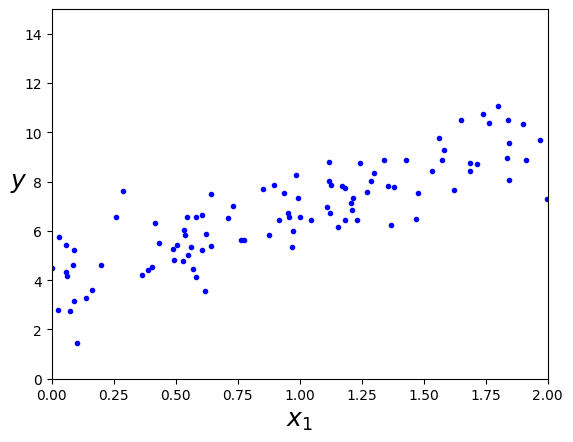

In [15]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([0,2,0,15])
plt.show()

https://scikit-learn.org/stable/modules/classes.html

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[3.92299509] [[2.976714]]


## 梯度下降
- ![梯度下降](img/img.png)
- 选好初始位置
- ![](img/img_1.png)
- 标准化作用：使特征向量长度为1
- ![](img/img_2.png)

## minibatch
如果使用全量梯度下降（Batch Gradient Descent，BGD），每次更新参数时都要计算整个训练集的梯度，当训练数据量非常大时，计算量极其庞大，耗时很长。而 minibatch 梯度下降每次只计算一小部分样本的梯度，大大减少了每次迭代的计算量，加快了训练速度。

## 多项式回归

In [17]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

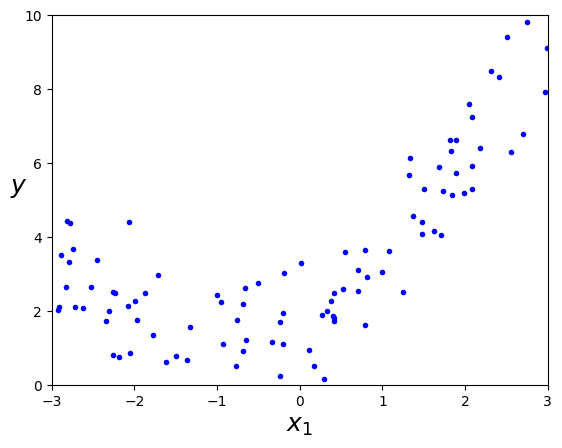

In [18]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([-3,3,0,10])
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X) 

In [20]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[1.73895795] [[1.06699698 0.54673497]]


(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

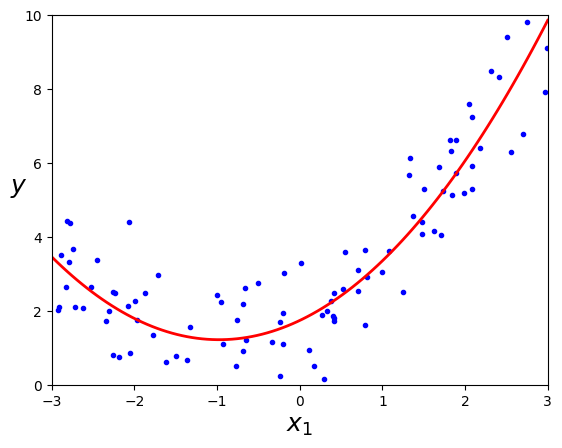

In [21]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([-3,3,0,10])

## 构建sklearn的工作流

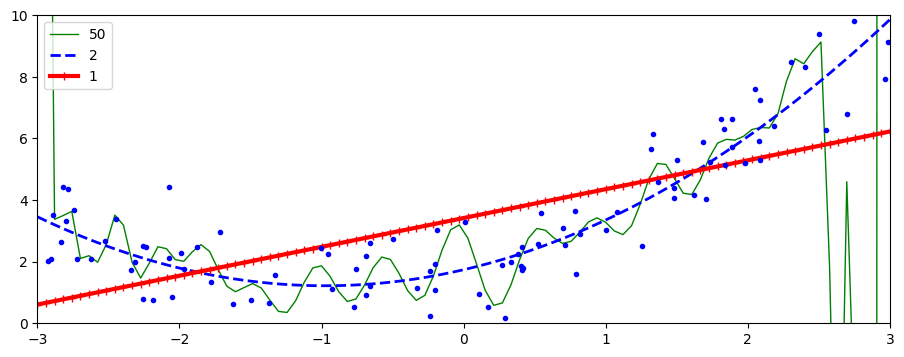

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(11,4))
for style,width,degree in (("g-",1,50),("b--",2,2),("r-+",3,1)):
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)
    std = StandardScaler()
    lin_reg=LinearRegression()
    polynomial_reg=Pipeline([("poly_features",poly_features),("StandardScaler",std),("lin_reg",lin_reg)])
    polynomial_reg.fit(X,y)
    y_new_2=polynomial_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,linewidth=width,label=str(degree))
plt.plot(X,y,'b.')
plt.axis([-3,3,0,10])
plt.legend(loc="upper left")
plt.show()

## 正则化
- 正则化：限制模型复杂度，防止过拟合
- 损失函数$J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}$
- 举例：$\begin{align*}
&\text{设特征向量 } \mathbf{x} = [x_1, x_2, x_3, x_4]=[1, 1, 1, 1]\\
&\text{参数向量 }\theta_1 = [1, 0, 0, 0]\\
&\text{参数向量 }\theta_2 = \left[\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}\right]
\end{align*}$
    - 计算：$\begin{align*}
\sum_{i = 1}^{4} \theta_{1i}^{2} &= 1^2 + 0^2 + 0^2 + 0^2 \\
&= 1\\
\sum_{i = 1}^{4} \theta_{2i}^{2} &= \left(\frac{1}{4}\right)^2\times4 \\
&= \frac{1}{4}
\end{align*}$
- 岭回归
    - 如下可知图像（2）红线最好，他的$\alpha = 1$,影响高,所以正则化程度高  

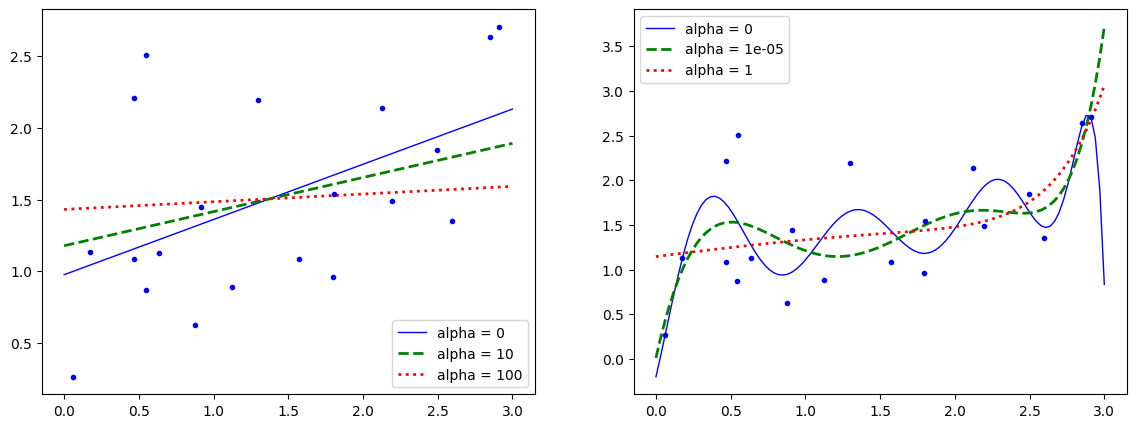

In [25]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)
def plot_model(model_calss, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_calss(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                              ('StandardScaler', StandardScaler()),
                              ('lin_reg', model)])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label='alpha = {}'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend()


plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10 ** -5, 1))
plt.show()

## Lasso
- 损失函数$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_{i}|$

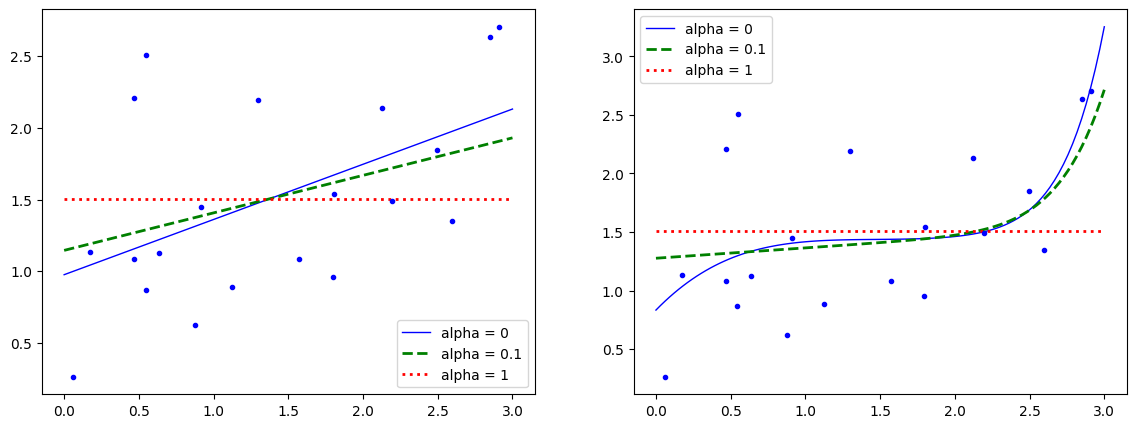

In [26]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10**-1, 1))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10 ** -1, 1))